In [7]:
import os
os.environ["ML_DATA_PATH"] ="/home/jbs47/MLSALT4/nips14-ssl/data"

In [8]:
# Check that the variable was correctly set
! echo $ML_DATA_PATH

/home/jbs47/MLSALT4/nips14-ssl/data


In [9]:
! ls

12ss3000.log	   preprocessing.py		run_m12ss3000.sh
Icon?		   preprocessing.pyc		run_m12ss600.log
LICENSE		   reproduce.ipynb		run_m12ss600.sh
README.md	   results			run_m2.log
adam.py		   results_v0			run_m2.sh
adam.pyc	   run_2layer_ssl.py		run_m2fs.log
anglepy		   run_alpha02_3000.log		run_m2fs.sh
data		   run_alpha05_3000.log		run_sl.py
exp_ssl.py	   run_analogies.py		run_tsvm.py
gpulearn_yz_x.py   run_flying.py		save_figure
gpulearn_yz_x.pyc  run_gpulearn_yz_x.py		setup_env.sh
gpulearn_z_x.py    run_gpulearn_yz_x_mnist.log	test.sh
gpulearn_z_x.pyc   run_gpulearn_yz_x_norb.log	test_gpu.py
learn_yz_x_ss.py   run_gpulearn_z_x.py		tmp.log
learn_yz_x_ss.pyc  run_m1.log			tmp.py
mnistmodels	   run_m1.sh			tmptest
models		   run_m12ss100.sh		train_and_test.log
nohup.out	   run_m12ss1000.log
poster_results	   run_m12ss1000.sh


Try testing the proved M1+M2 model:

In [23]:
! python run_sl.py mnist

Traceback (most recent call last):
  File "run_sl.py", line 31, in <module>
    ndict.set_value(model.v, ndict.loadz(dir+'v.ndict.tar.gz'))
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/ndict.py", line 167, in set_value
    return {i: d[i].set_value(d2[i]) for i in d}
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/ndict.py", line 167, in <dictcomp>
    return {i: d[i].set_value(d2[i]) for i in d}
  File "/remote/mlsalt-2016/jbs47/kerastheano/local/lib/python2.7/site-packages/theano/compile/sharedvalue.py", line 127, in set_value
    self.container.value = copy.deepcopy(new_value)
  File "/remote/mlsalt-2016/jbs47/kerastheano/local/lib/python2.7/site-packages/theano/gof/link.py", line 468, in __set__
    self.storage[0] = self.type.filter(value, **kwargs)
  File "/remote/mlsalt-2016/jbs47/kerastheano/local/lib/python2.7/site-packages/theano/tensor/type.py", line 139, in filter
    raise TypeError(err_msg, data)
TypeError: ('TensorType(float32, matrix) cannot

Train the M1 model with just 2 iterations:

In [75]:
! THEANO_FLAGS=floatX=float32 python run_gpulearn_z_x.py mnist

Traceback (most recent call last):
  File "run_gpulearn_z_x.py", line 1, in <module>
    import gpulearn_z_x
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/gpulearn_z_x.py", line 8, in <module>
    import anglepy as ap
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/__init__.py", line 1, in <module>
    from anglepy.BNModel import *
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/BNModel.py", line 2, in <module>
    import theano
ImportError: No module named theano


Train the M1+M2 model with just 2 iterations:

In [38]:
!  python run_2layer_ssl.py 600 1


Usage: python [this_script.py] [n_labels] [seed]
n_labels: 600
seed: 1
logdir: results/learn_yz_x_ss_mnist_2layer_50-(500, 500)_nlabeled600_alpha0.1_seed1_-1488227057/
run_2layer_ssl.py 600 50 (500, 500) mnist_2layer 1 
177.627851009 0 88.1500935205 0.9038 0.8987
348.281799078 1 88.0610046735 0.9006 0.9006


In [40]:
! python run_sl.py mnist

(50, 10000)
Computing class posteriors using a marginal likelihood estimate with importance sampling using  3  samples.
This is slow, but could be sped up significantly by fitting a classifier to match the posteriors (of the generative model) in the training set.
For MNIST, this should converge to ~ 0.96 % error.
^C


# Semi-superviesd models

## Training M2 models

TODO: Skip that for now, more important to have mutlipel runs of the stacked.

## Multiple runs of the M1 + M2 model

In [ ]:
   PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND
111007 jbs47     20   0  0.284t 865784 100432 R  1706  0.3  55966:55 python
 82581 jbs47     20   0  0.284t 863016 100432 R  1480  0.3  51558:00 python
111088 jbs47     20   0  0.284t 865328 100432 R  1415  0.3  55964:12 python
121532 jbs47     20   0  0.282t 712068  96164 R  99.9  0.3  82:11.70 python
 82259 sp838     20   0  364816  57324   7268 S   1.0  0.0   0:17.61 jupyter-noteb

These three long runnign are:

drwxr-xr-x 2 jbs47 mlsltm16   4096 Mar  9 00:50 learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.2_seed1_-1488809906

drwxr-xr-x 2 jbs47 mlsltm16   4096 Mar  9 00:51 learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.5_seed1_-1488809959

drwxr-xr-x 2 jbs47 mlsltm16   4096 Mar  9 00:51 learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.5_seed1_-1488821707

Running with different seeds

## 100 labels

Seed 1

In [256]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha0.1_seed1_-1488578565/hook.txt'
! tail {path}
! ls -l {path}

164276.870054 2990 71.393621764 0.0318 0.0341
164330.976694 2991 71.4148214304 0.0317 0.0341
164383.422019 2992 71.4353877784 0.032 0.0347
164437.143856 2993 71.4400515827 0.0312 0.0334
164489.037069 2994 71.4203019368 0.0311 0.0349
164542.034467 2995 71.4404737652 0.0303 0.0332
164595.978744 2996 71.4456724322 0.0308 0.0339
164651.040265 2997 71.4405373793 0.0308 0.0342
164705.906807 2998 71.4025304521 0.0331 0.0355
164757.768602 2999 71.4149939249 0.0322 0.0348
-rw-r--r-- 1 jbs47 mlsltm16 138058 Mar  5 19:48 results/learn_yz_x_ss_mnist_2layer_50-(300,)_nlabeled100_alpha0.1_seed1_-1488578565/hook.txt


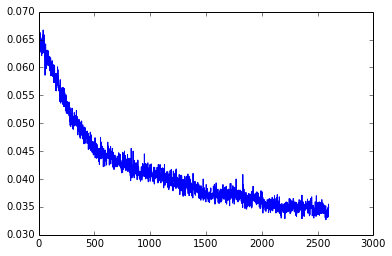

In [257]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
plt.show()

Seed 2 (PID 52004) cpu2

In [28]:
# nohup python run_2layer_ssl.py 100 2 > m12ss100_seed2.log &

In [258]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha0.1_seed2_-1489085316/hook.txt'
! tail {path}
! ls -l {path}

190259.59468 1484 71.5106148449 0.0443 0.0444
190394.689101 1485 71.5406892372 0.0428 0.0431
190522.953905 1486 71.5236239066 0.0421 0.0424
190649.246709 1487 71.5452530545 0.0436 0.045
190771.287738 1488 71.5529240363 0.0412 0.0431
190897.408132 1489 71.5283918788 0.0426 0.0429
191009.553613 1490 71.5601613272 0.043 0.044
191128.504678 1491 71.5438442343 0.0416 0.0431
191253.95789 1492 71.5493295825 0.042 0.044
191387.588603 1493 71.4939581767 0.0433 0.044
-rw-r--r-- 1 jbs47 mlsltm16 68216 Mar 11 23:58 results/learn_yz_x_ss_mnist_2layer_50-(300,)_nlabeled100_alpha0.1_seed2_-1489085316/hook.txt


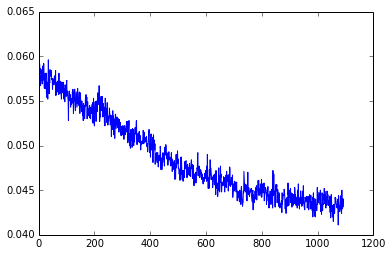

In [259]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
plt.show()

Seed 3 (PID 52177): cpu2

In [35]:
# nohup python run_2layer_ssl.py 100 3 > m12ss100_seed3.log

In [254]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha0.1_seed3_-1489085383/hook.txt'
! tail {path}
! ls -l {path}

190070.027071 1481 71.5695296299 0.0501 0.0491
190196.324653 1482 71.5727878912 0.0491 0.0462
190329.847364 1483 71.5655935185 0.0496 0.0468
190463.448017 1484 71.5453968983 0.0492 0.0472
190602.191081 1485 71.5686252854 0.0488 0.0451
190748.177387 1486 71.5922131985 0.0505 0.0475
190875.909291 1487 71.5431718043 0.048 0.0445
191019.702115 1488 71.5921100246 0.0483 0.0463
191151.551475 1489 71.5513781793 0.0496 0.0479
191271.854738 1490 71.5474720146 0.0474 0.0452
-rw-r--r-- 1 jbs47 mlsltm16 68012 Mar 11 23:57 results/learn_yz_x_ss_mnist_2layer_50-(300,)_nlabeled100_alpha0.1_seed3_-1489085383/hook.txt


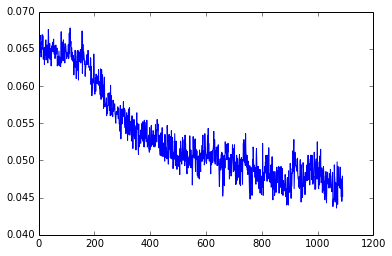

In [255]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
plt.show()

## 600 labels

In [252]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled600_alpha0.1_seed1_-1488586063/hook.txt'
! tail {path}
! ls -l {path}

236996.3632 2990 72.7972514237 0.0227 0.0233
237063.750047 2991 72.7661236486 0.0223 0.0226
237133.014528 2992 72.7710335677 0.023 0.0233
237201.481931 2993 72.8067713147 0.0239 0.024
237269.470053 2994 72.7863078113 0.0221 0.0227
237335.376728 2995 72.8056606295 0.0224 0.0221
237403.708779 2996 72.7612009359 0.0224 0.0231
237470.804784 2997 72.7216746197 0.0226 0.023
237538.216696 2998 72.7409599921 0.0228 0.0228
237606.592447 2999 72.7864682098 0.0223 0.0235
-rw-r--r-- 1 jbs47 mlsltm16 138275 Mar  6 18:08 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled600_alpha0.1_seed1_-1488586063/hook.txt


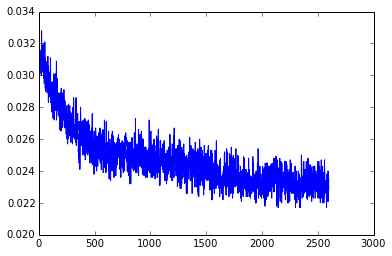

In [253]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
plt.show()

Seed 2: (PID 52240) cpu2

In [ ]:
# nohup python run_2layer_ssl.py 600 2 > m12ss600_seed2.log &

In [260]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha0.1_seed3_-1489085383/hook.txt'
! tail {path}
! ls -l {path}

190196.324653 1482 71.5727878912 0.0491 0.0462
190329.847364 1483 71.5655935185 0.0496 0.0468
190463.448017 1484 71.5453968983 0.0492 0.0472
190602.191081 1485 71.5686252854 0.0488 0.0451
190748.177387 1486 71.5922131985 0.0505 0.0475
190875.909291 1487 71.5431718043 0.048 0.0445
191019.702115 1488 71.5921100246 0.0483 0.0463
191151.551475 1489 71.5513781793 0.0496 0.0479
191271.854738 1490 71.5474720146 0.0474 0.0452
191390.502615 1491 71.5427494443 0.0479 0.0452
-rw-r--r-- 1 jbs47 mlsltm16 68059 Mar 11 23:59 results/learn_yz_x_ss_mnist_2layer_50-(300,)_nlabeled100_alpha0.1_seed3_-1489085383/hook.txt


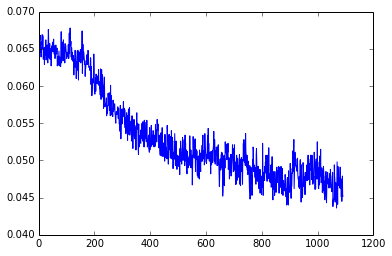

In [261]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
plt.show()

Seed 3, PID 52307 cpu2

In [ ]:
# nohup python run_2layer_ssl.py 600 3 > m12ss600_seed3.log &

In [248]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled600_alpha0.1_seed3_-1489085694/hook.txt'
! tail {path}
! ls -l {path}

189004.177771 915 72.9834852234 0.0244 0.027
189188.816737 916 72.957386848 0.0251 0.0253
189376.595887 917 72.9530094022 0.0236 0.0252
189573.441672 918 72.9858235497 0.0241 0.0251
189776.262321 919 72.9443445074 0.0244 0.0262
189981.434772 920 72.9396941424 0.0254 0.0258
190192.745346 921 72.9627334465 0.0245 0.0255
190390.254847 922 72.9513117231 0.0248 0.0259
190588.808072 923 72.9770671334 0.0247 0.0261
190771.840745 924 72.9273524748 0.0255 0.0264
-rw-r--r-- 1 jbs47 mlsltm16 41889 Mar 11 23:54 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled600_alpha0.1_seed3_-1489085694/hook.txt


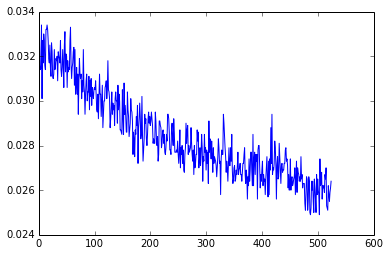

In [249]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
plt.show()

## 1000 labels

Seed 1,  finished

In [246]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled1000_alpha0.1_seed1_-1488586240/hook.txt'
! tail {path}
! ls -l {path}

217140.845713 2990 72.7796634512 0.024 0.0221
217192.59125 2991 72.7657650082 0.0226 0.0231
217244.211284 2992 72.8077887388 0.0252 0.0233
217293.727213 2993 72.7492884587 0.0247 0.0227
217343.370791 2994 72.7780671843 0.024 0.022
217393.011452 2995 72.7897659339 0.0243 0.0235
217443.063142 2996 72.8103119414 0.0242 0.0224
217493.430806 2997 72.7771902466 0.0252 0.0231
217546.301756 2998 72.8417550364 0.0255 0.0228
217595.751569 2999 72.791896221 0.0248 0.022
-rw-r--r-- 1 jbs47 mlsltm16 138158 Mar  6 12:37 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled1000_alpha0.1_seed1_-1488586240/hook.txt


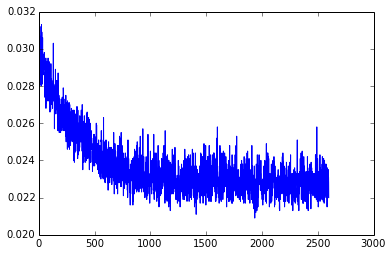

In [247]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
plt.show()

Seed 2, PID 105193 cpu1

In [ ]:
# nohup python run_2layer_ssl.py 1000 2 > m12ss1000_seed2.log &

In [262]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled1000_alpha0.1_seed2_-1489086004/hook.txt'
! tail {path}
! ls -l {path}

188602.284968 576 73.0307068126 0.0263 0.0261
188849.432447 577 73.0248423012 0.0266 0.0269
189100.603696 578 73.0338180626 0.0259 0.0271
189304.321572 579 73.0195702694 0.0264 0.0267
189503.245947 580 73.0687444135 0.0272 0.0286
189739.054007 581 73.0643116205 0.0268 0.0275
189987.728926 582 73.0798629266 0.0257 0.0253
190218.06491 583 73.0374678725 0.0259 0.0268
190470.911856 584 73.0039099889 0.0262 0.0274
190683.940693 585 73.0665928931 0.0262 0.0272
-rw-r--r-- 1 jbs47 mlsltm16 26502 Mar 11 23:58 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled1000_alpha0.1_seed2_-1489086004/hook.txt


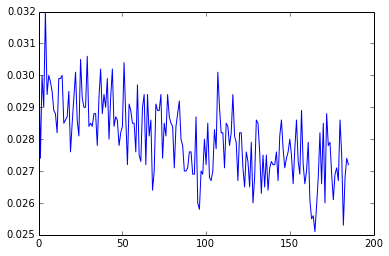

In [263]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
plt.show()

Seed 3, PID 106527 cpu1

In [ ]:
# nohup python run_2layer_ssl.py 1000 3 > m12ss1000_seed3.log &

In [264]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled1000_alpha0.1_seed3_-1489086096/hook.txt'
! tail {path}
! ls -l {path}

187990.985744 541 73.0315647124 0.0276 0.0289
188284.13448 542 73.0787641952 0.0275 0.029
188567.074056 543 73.0551519621 0.0277 0.0302
188892.755432 544 73.0947618177 0.0274 0.0306
189228.547657 545 73.060117913 0.0272 0.0289
189488.681439 546 73.0679374276 0.0283 0.0289
189734.598009 547 73.0070013719 0.0282 0.0288
190006.992002 548 73.0702354488 0.0277 0.0283
190267.917632 549 73.0538662809 0.03 0.0315
190566.083522 550 73.0523619496 0.0285 0.0295
-rw-r--r-- 1 jbs47 mlsltm16 24888 Mar 11 23:57 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled1000_alpha0.1_seed3_-1489086096/hook.txt


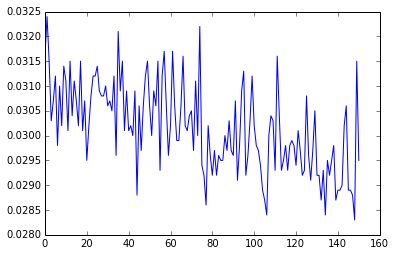

In [265]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
plt.show()

## 3000 labels

In [239]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed1_-1488587057/hook.txt'
! tail {path}

213319.384093 2990 72.8102919374 0.0195 0.0196
213390.402177 2991 72.7835561121 0.0186 0.0195
213461.748811 2992 72.7821567583 0.0195 0.019
213532.512361 2993 72.8207197817 0.0197 0.0199
213602.723051 2994 72.809942807 0.019 0.0202
213673.341679 2995 72.7810810574 0.0194 0.0199
213744.804211 2996 72.8095860878 0.0188 0.0192
213814.786408 2997 72.8654309106 0.0195 0.0195
213885.498968 2998 72.8000426033 0.0201 0.0198
213954.68233 2999 72.8188849631 0.0203 0.0199


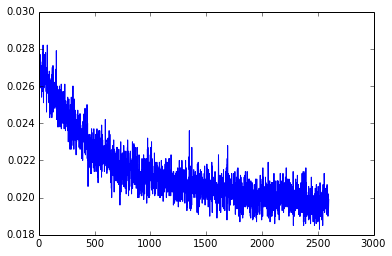

In [242]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
plt.show()

Seed 2, PID 106947 cpu1

In [ ]:
# nohup python run_2layer_ssl.py 3000 2 > m12ss3000_seed2.log &

In [266]:
! tail results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed2_-1489086138/hook.txt

188142.669122 566 73.0658560974 0.0237 0.0231
188405.558628 567 73.0439326157 0.024 0.0244
188691.100118 568 73.0716495581 0.0247 0.0249
188968.357206 569 72.996238943 0.0243 0.0232
189281.122801 570 73.0377012054 0.0244 0.0237
189562.701042 571 73.0847044237 0.0242 0.0253
189826.31182 572 73.0556699696 0.0253 0.0253
190079.00313 573 73.0589644672 0.0235 0.0242
190372.041107 574 73.063316813 0.0234 0.0239
190708.564926 575 73.0577710905 0.0232 0.0233


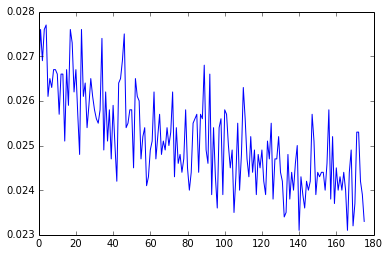

In [267]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed2_-1489086138/hook.txt | awk '{print $5}'
plt.plot(data[400:])
plt.show()

Seed 3, PID 107381 cpu1

In [ ]:
# nohup python run_2layer_ssl.py 3000 3 > m12ss3000_seed3.log &

In [235]:
! tail results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed3_-1489086181/hook.txt

186596.928477 574 73.0598745295 0.0236 0.0241
186836.342659 575 73.0105625521 0.0237 0.0235
187082.318821 576 73.0102281621 0.0239 0.0247
187331.409408 577 73.0316146975 0.0243 0.0239
187586.407322 578 73.0042266608 0.0237 0.0254
187822.851009 579 73.0458229051 0.0231 0.024
188062.376829 580 73.0560609387 0.0234 0.0251
188319.203417 581 73.0383276048 0.023 0.0241
188544.162512 582 73.0345926183 0.0234 0.0235
188764.244317 583 73.0487114154 0.0237 0.0247


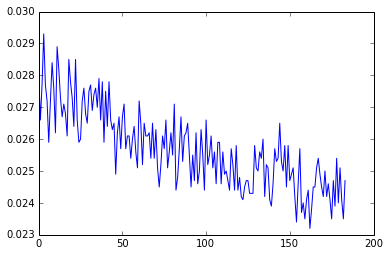

In [234]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed3_-1489086181/hook.txt | awk '{print $5}'
plt.plot(data[400:])
plt.show()

## 3000 labels alphas

In [155]:
! tail results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.2_seed1_-1488809906/hook.txt

209806.864213 1635 72.8573913744 0.0207 0.019
209951.600566 1636 72.8943217649 0.0203 0.0207
210074.872009 1637 72.8849973783 0.0198 0.0198
210200.638269 1638 72.8645671383 0.02 0.0183
210332.231063 1639 72.8756832648 0.0197 0.0196
210445.29427 1640 72.8616483216 0.0197 0.0199
210577.79327 1641 72.8440176413 0.02 0.0195
210696.071806 1642 72.8616574953 0.0202 0.02
210822.334378 1643 72.9000009615 0.0194 0.0176
210944.87134 1644 72.8733546431 0.0207 0.0196


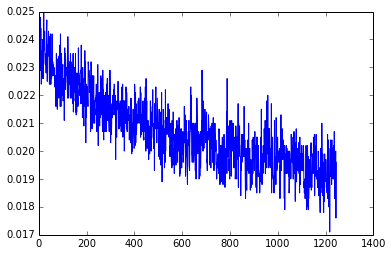

In [233]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.2_seed1_-1488809906/hook.txt | awk '{print $5}'
plt.plot(data[400:])
plt.show()

In [217]:
! tail results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.5_seed1_-1488821707/hook.txt

198069.600326 1484 72.9052759529 0.021 0.0211
198186.929515 1485 72.8885048105 0.0207 0.0217
198326.31849 1486 72.9158896015 0.0204 0.0205
198454.583899 1487 72.8876280542 0.0214 0.0209
198572.54211 1488 72.8873970049 0.0211 0.0209
198692.187431 1489 72.8907201978 0.0211 0.0209
198819.198823 1490 72.9224296076 0.0207 0.0205
198944.166178 1491 72.866943509 0.0206 0.0208
199059.027008 1492 72.9111058898 0.0209 0.0213
199186.207072 1493 72.9320046438 0.0203 0.0208


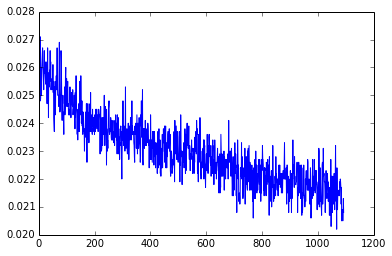

In [230]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.5_seed1_-1488821707/hook.txt | awk '{print $5}'
plt.plot(data[400:])
plt.show()

In [215]:
! tail results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.5_seed1_-1488809959/hook.txt 

209854.755776 1632 72.9140488012 0.02 0.0206
209975.980776 1633 72.9160516255 0.0195 0.0209
210097.240637 1634 72.9233233178 0.02 0.021
210223.57153 1635 72.9192881207 0.0197 0.0209
210344.834184 1636 72.9074541687 0.02 0.0214
210484.11199 1637 72.8995068081 0.0209 0.0213
210605.83095 1638 72.8746545655 0.0213 0.0212
210717.056651 1639 72.8943892667 0.0209 0.0204
210828.540054 1640 72.9000170031 0.0208 0.021
210961.282799 1641 72.8896823533 0.0204 0.0217


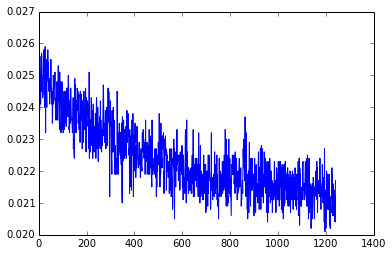

In [231]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.5_seed1_-1488809959/hook.txt  | awk '{print $5}'
plt.plot(data[400:])
plt.show()

Changed alpha to 1.0 in run_2layer.py (then reseted to 0.1) and started with (PID 109123, cpu1): 

In [ ]:
# nohup python run_2layer_ssl.py 3000 1 > run_alpha10_3000_seed1.log &

In [225]:
!  tail  results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha1.0_seed1_-1489086385/hook.txt > tmp.txt

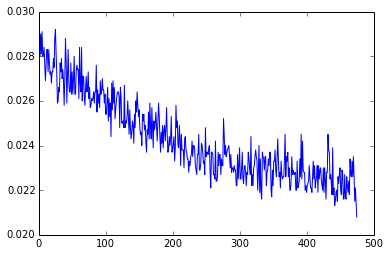

In [268]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha1.0_seed1_-1489086385/hook.txt  | awk '{print $5}'
plt.plot(data[200:])
plt.show()

# Fully supervise

TODO: M1 + M2 stacked with fully supervised. To get the 0.96% error. Isnt the the m2 models itself with its z hidden enough? Wasnt the model inthe orignal test file like that?

Checking what performance gives this M2 only (or not ??) model: But it does not contain probability. so need to use the testing scirpt? Yes that is it,

In [69]:
! ls -l results/gpulearn_yz_x_svhn_300-\[500,\ 500\]-1488577059/w*

-rw-r--r-- 1 jbs47 mlsltm16 5266914 Mar  9 02:17 results/gpulearn_yz_x_svhn_300-[500, 500]-1488577059/w.ndict.tar.gz
-rw-r--r-- 1 jbs47 mlsltm16 5266831 Mar  9 01:41 results/gpulearn_yz_x_svhn_300-[500, 500]-1488577059/w_best.ndict.tar.gz


TODO: to test on SVHN need to modifythe scirpt.

For now train my on Mnist and check if can replicate (PID 121532).

In [ ]:
# python run_gpulearn_yz_x.py mnist

In [76]:
! ls -l results/gpulearn_yz_x_mnist_50-\(500,\ 500\)-1489015630

In [74]:
! python run_sl_fs.py mnist

Traceback (most recent call last):
  File "run_sl_fs.py", line 2, in <module>
    import anglepy
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/__init__.py", line 1, in <module>
    from anglepy.BNModel import *
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/BNModel.py", line 2, in <module>
    import theano
ImportError: No module named theano


## Train 2D version of the fully supervised

CPU2 PID 24460

In [ ]:
# nohup python run_gpulearn_yz_x.py mnist > m2_2d.log &

In [172]:
! tail -200 results/gpulearn_yz_x_mnist_2-\(500,\ 500\)-1489140992/hook.txt

43729.3185871 -113.597057018 -130.978103389
43780.0978971 -113.58510473 -131.007053711
43830.035455 -113.553171968 -130.942222529
43880.815006 -113.565552857 -130.938877547
43930.7829399 -113.56358954 -131.021711661
43981.349333 -113.708093123 -130.984590385
44032.0079701 -113.667575886 -130.991804994
44079.5453579 -113.554876512 -130.944772089
44126.3124261 -113.61548672 -131.04320558
44173.617861 -113.591049513 -130.991888786
44221.838789 -113.538664056 -131.005724167
44268.2815909 -113.602061036 -131.088369178
44314.2441111 -113.538049636 -131.026546782
44358.815834 -113.572325522 -130.988547623
44402.868753 -113.549945715 -131.025634207
44446.9094141 -113.621792379 -131.09119987
44495.311836 -113.602002825 -131.033963771
44547.100013 -113.5772901 -131.073299389
44598.775696 -113.544298964 -130.958874806
44651.058156 -113.560666835 -130.957503927
44703.33371 -113.552748157 -130.905292611
44755.686157 -113.508052276 -130.995578187
44807.1657779 -113.554837256 -130.98261013
44860.8575

Run the same for TSVM:

In [ ]:
nohup python run_gpulearn_yz_x.py mnist > m2_2d.log &

# Conditional generation

Generated based on fully suppervised model trained on raw data.

Analogy generated using the SVHN inside .. (best) based on random sampling. Cool example shows that even hard to recognise for human can be recognised and that handles correctly nearly mulitple digits (TODO: find out how does this work iwth vairance etc). Say that this is different from paper and using model we generated.

In [ ]:
! head results/analogies_new_svhn_1489014666/29_human.png

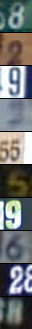

In [58]:
from IPython.display import Image
Image(filename='results/analogies_new_svhn_1489014666/29_human.png') 

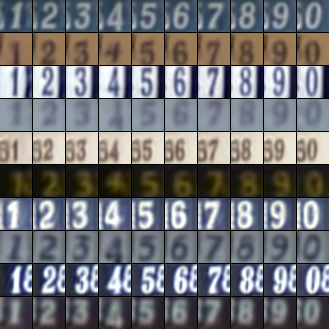

In [59]:
from IPython.display import Image
Image(filename='results/analogies_new_svhn_1489014666/29_machine.png') 

4 6 and 10 are hard to recognise but handles. Also some styels are not applied directly due tosmoothing ? the9

# Code analysis

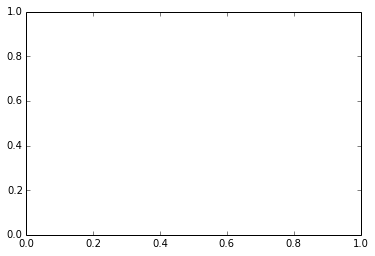

In [196]:
% matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [197]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

In [199]:
import numpy as np
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

In [200]:
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [203]:
plt.show()